In [1]:
import numpy as np

In [2]:
print(np.zeros(10, dtype=int))
print(np.ones((3, 5), dtype=float))
print(np.full((3, 5), 3.14))
print(np.arange(0, 20, 2))
print(np.linspace(0, 1, 5))
print(np.random.random((3, 3)))
print(np.random.normal(0, 1, (3, 3)))
print(np.random.randint(0, 10, (3, 3)))
print(np.eye(3))
print(np.empty(3))

[0 0 0 0 0 0 0 0 0 0]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14]]
[ 0  2  4  6  8 10 12 14 16 18]
[0.   0.25 0.5  0.75 1.  ]
[[0.16745492 0.24530073 0.94807613]
 [0.23467699 0.41017786 0.82179256]
 [0.50232225 0.86474282 0.73734412]]
[[ 1.05155573 -0.17882506  0.37449319]
 [ 0.39646182  1.35171357  3.0695854 ]
 [-1.0349453  -0.07055672  0.12590681]]
[[9 0 5]
 [0 5 2]
 [3 0 7]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[1. 1. 1.]


## ブロードキャスト

In [3]:
a = np.array([0,1,2])
b = np.array([5,5,5])
a + b


array([5, 6, 7])

In [4]:
a + 5

array([5, 6, 7])

In [5]:
M = np.ones((3, 3))
M + a


array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [6]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

a + b

[0 1 2]
[[0]
 [1]
 [2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [7]:
M = np.ones((2, 3))
a = np.arange(3)

print(M.shape)
print(a.shape)

M + a

(2, 3)
(3,)


array([[1., 2., 3.],
       [1., 2., 3.]])

In [8]:
a = np.arange(3)[:, np.newaxis]
b = np.arange(3)

print(a)
print(a.shape)
print(b.shape)

a + b

[[0]
 [1]
 [2]]
(3, 1)
(3,)


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [9]:
X = np.random.random((10, 3))
Xmean = X.mean(0)
X_centered = X - Xmean
X_centered.mean(0)

array([1.11022302e-17, 4.44089210e-17, 8.88178420e-17])

In [10]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

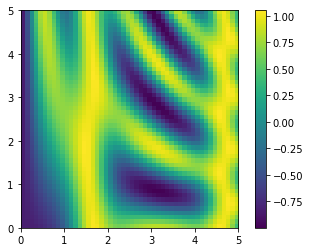

In [12]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

## 比較、マスク、ブール論理

In [13]:
x = np.array([1,2,3,4])

In [14]:
print(x < 3)
print(x > 3)
print(x <= 3)
print(x >= 3)
print(x != 3)
print(x == 3)
print((2 * x) == (x ** 2))

[ True  True False False]
[False False False  True]
[ True  True  True False]
[False False  True  True]
[ True  True False  True]
[False False  True False]
[False  True False False]


In [15]:
np.count_nonzero(x < 3)

2

### マスクとしてのブール値配列

In [16]:
x[x < 3]

array([1, 2])

## ファンシーインデクス

In [17]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [18]:
ind = np.array([[3,7],[4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [19]:
### 例: K-means

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [23]:
X = rand.rand(10, 2)

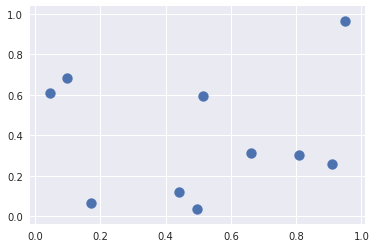

In [24]:
plt.scatter(X[:, 0], X[:, 1], s=100)

In [28]:
X

array([[0.51423444, 0.59241457],
       [0.04645041, 0.60754485],
       [0.17052412, 0.06505159],
       [0.94888554, 0.96563203],
       [0.80839735, 0.30461377],
       [0.09767211, 0.68423303],
       [0.44015249, 0.12203823],
       [0.49517691, 0.03438852],
       [0.9093204 , 0.25877998],
       [0.66252228, 0.31171108]])

In [26]:
X[:, np.newaxis, :]

array([[[0.51423444, 0.59241457]],

       [[0.04645041, 0.60754485]],

       [[0.17052412, 0.06505159]],

       [[0.94888554, 0.96563203]],

       [[0.80839735, 0.30461377]],

       [[0.09767211, 0.68423303]],

       [[0.44015249, 0.12203823]],

       [[0.49517691, 0.03438852]],

       [[0.9093204 , 0.25877998]],

       [[0.66252228, 0.31171108]]])

In [27]:
X[np.newaxis, :, :]

array([[[0.51423444, 0.59241457],
        [0.04645041, 0.60754485],
        [0.17052412, 0.06505159],
        [0.94888554, 0.96563203],
        [0.80839735, 0.30461377],
        [0.09767211, 0.68423303],
        [0.44015249, 0.12203823],
        [0.49517691, 0.03438852],
        [0.9093204 , 0.25877998],
        [0.66252228, 0.31171108]]])

In [30]:
diff = X[:, np.newaxis, :] - X[np.newaxis, :, :]
diff

array([[[ 0.        ,  0.        ],
        [ 0.46778403, -0.01513028],
        [ 0.34371031,  0.52736298],
        [-0.4346511 , -0.37321746],
        [-0.29416291,  0.2878008 ],
        [ 0.41656232, -0.09181846],
        [ 0.07408194,  0.47037633],
        [ 0.01905753,  0.55802605],
        [-0.39508596,  0.33363459],
        [-0.14828785,  0.28070349]],

       [[-0.46778403,  0.01513028],
        [ 0.        ,  0.        ],
        [-0.12407371,  0.54249326],
        [-0.90243512, -0.35808718],
        [-0.76194694,  0.30293108],
        [-0.0512217 , -0.07668817],
        [-0.39370208,  0.48550662],
        [-0.4487265 ,  0.57315633],
        [-0.86286999,  0.34876487],
        [-0.61607187,  0.29583378]],

       [[-0.34371031, -0.52736298],
        [ 0.12407371, -0.54249326],
        [ 0.        ,  0.        ],
        [-0.77836141, -0.90058044],
        [-0.63787322, -0.23956218],
        [ 0.07285201, -0.61918143],
        [-0.26962837, -0.05698664],
        [-0.32465279,  0

In [35]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq

array([[0.        , 0.21905082, 0.39624849, 0.32821285, 0.16936112,
        0.1819548 , 0.22674203, 0.31175626, 0.26740496, 0.10078374],
       [0.21905082, 0.        , 0.30969322, 0.94261558, 0.67233037,
        0.00850474, 0.390718  , 0.52986365, 0.86618155, 0.46706217],
       [0.39624849, 0.30969322, 0.        , 1.41689162, 0.46427229,
        0.38869306, 0.07594694, 0.10633966, 0.58335063, 0.30290309],
       [0.32821285, 0.94261558, 1.41689162, 0.        , 0.45668208,
        0.80374969, 0.97045981, 1.073066  , 0.50120522, 0.50961653],
       [0.16936112, 0.67233037, 0.46427229, 0.45668208, 0.        ,
        0.64924114, 0.1689381 , 0.17112873, 0.0122862 , 0.02132991],
       [0.1819548 , 0.00850474, 0.38869306, 0.80374969, 0.64924114,
        0.        , 0.43335579, 0.58030794, 0.83978324, 0.45782832],
       [0.22674203, 0.390718  , 0.07594694, 0.97045981, 0.1689381 ,
        0.43335579, 0.        , 0.01071016, 0.23881683, 0.08542411],
       [0.31175626, 0.52986365, 0.1063396

In [34]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
nearlest = np.argsort(dist_sq, axis=1)
nearlest

array([[0, 9, 4, 5, 1, 6, 8, 7, 3, 2],
       [1, 5, 0, 2, 6, 9, 7, 4, 8, 3],
       [2, 6, 7, 9, 1, 5, 0, 4, 8, 3],
       [3, 0, 4, 8, 9, 5, 1, 6, 7, 2],
       [4, 8, 9, 6, 0, 7, 3, 2, 5, 1],
       [5, 1, 0, 2, 6, 9, 7, 4, 3, 8],
       [6, 7, 2, 9, 4, 0, 8, 1, 5, 3],
       [7, 6, 9, 2, 4, 8, 0, 1, 5, 3],
       [8, 4, 9, 7, 6, 0, 3, 2, 5, 1],
       [9, 4, 8, 6, 0, 7, 2, 5, 1, 3]])

In [39]:
K = 2
nearlest_partition = np.argpartition(dist_sq, K+1, axis=1)

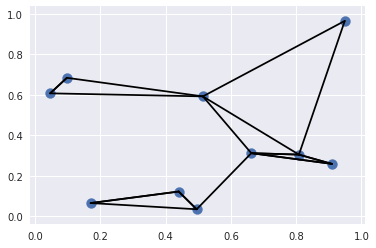

In [40]:
plt.scatter(X[:, 0], X[:, 1], s=100)

for i in range(X.shape[0]):
    for j in nearlest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

(0.5142344384136116, 0.046450412719997725) (0.5924145688620425, 0.6075448519014384)
